In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC


In [2]:
def accuracy(y, y_hat):    
    accuracy_score = (y == y_hat).mean()
    return accuracy_score

In [4]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(\
    PolynomialFeatures(degree=3),\
    StandardScaler(),\
    SVC(C=10, max_iter=3000, random_state=42))

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, max_iter=3000, random_state=42))])

SVC: C, train_acc =  10 0.98
SVC: C, train_acc =  1000 0.98


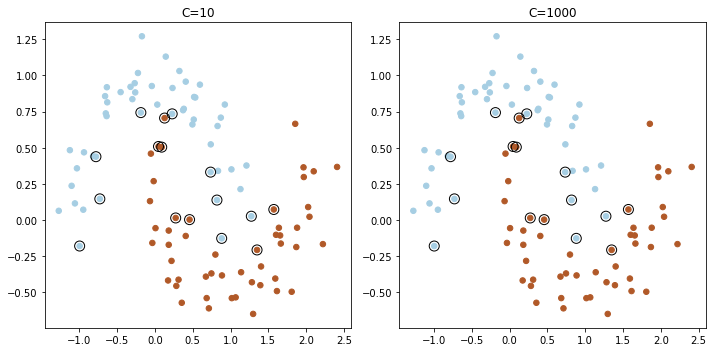

In [6]:
#train and plot the decision boundary

polynomial_features = make_pipeline(\
    PolynomialFeatures(degree=3),\
    StandardScaler())

plt.figure(figsize=(10, 5))
for i, C in enumerate([10, 1000]):
    # "hinge" is the standard SVM loss

    full_pipeline = make_pipeline(polynomial_features, SVC(kernel = "poly", degree = 3, coef0 = 1))
    
    clf = polynomial_svm_clf.fit(X, y)
    #clf = full_pipeline.fit(X, y)
    
    #compute the accuracy of train
    
    y_train_predictions = clf.predict(X)
    
    train_acc = accuracy(y, y_train_predictions)
    
    print("SVC: C, train_acc = ", str(C), train_acc)
    
    
    #clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
#    DecisionBoundaryDisplay.from_estimator(
#        clf,
#        X,
#        ax=ax,
#        grid_resolution=50,
#        plot_method="contour",
#        colors="k",
#        levels=[-1, 0, 1],
#        alpha=0.5,
#        linestyles=["--", "-", "--"],
#    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show() 